# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib

In [2]:
# Importar Dataset preporcesado como dataframe de pandas
df = pd.read_csv("../Data/healthcare-dataset-stroke-data.csv")
df = df.drop(columns=["id"])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Imputar datos de BMI con knn**

Lo hacemos pq no queremos simplemente numerar las variables categoricas


In [3]:
from sklearn.impute import KNNImputer
# Separar las columnas numéricas para la imputación
numeric_features = df[['bmi', 'age', 'avg_glucose_level']]

# Inicializar el imputador KNN con el número de vecinos deseado (por ejemplo, 3)
knn_imputer = KNNImputer(n_neighbors=3)

# Imputar los datos
imputed_data = knn_imputer.fit_transform(numeric_features)

# Convertir la matriz de nuevo a un DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_features.columns)

# Reemplazar los datos originales con los datos imputados
df['bmi'] = imputed_df['bmi']

In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.5,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,26.8,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Distribución de los datos


In [5]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [6]:
# Cambiar la fuente globalmente
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

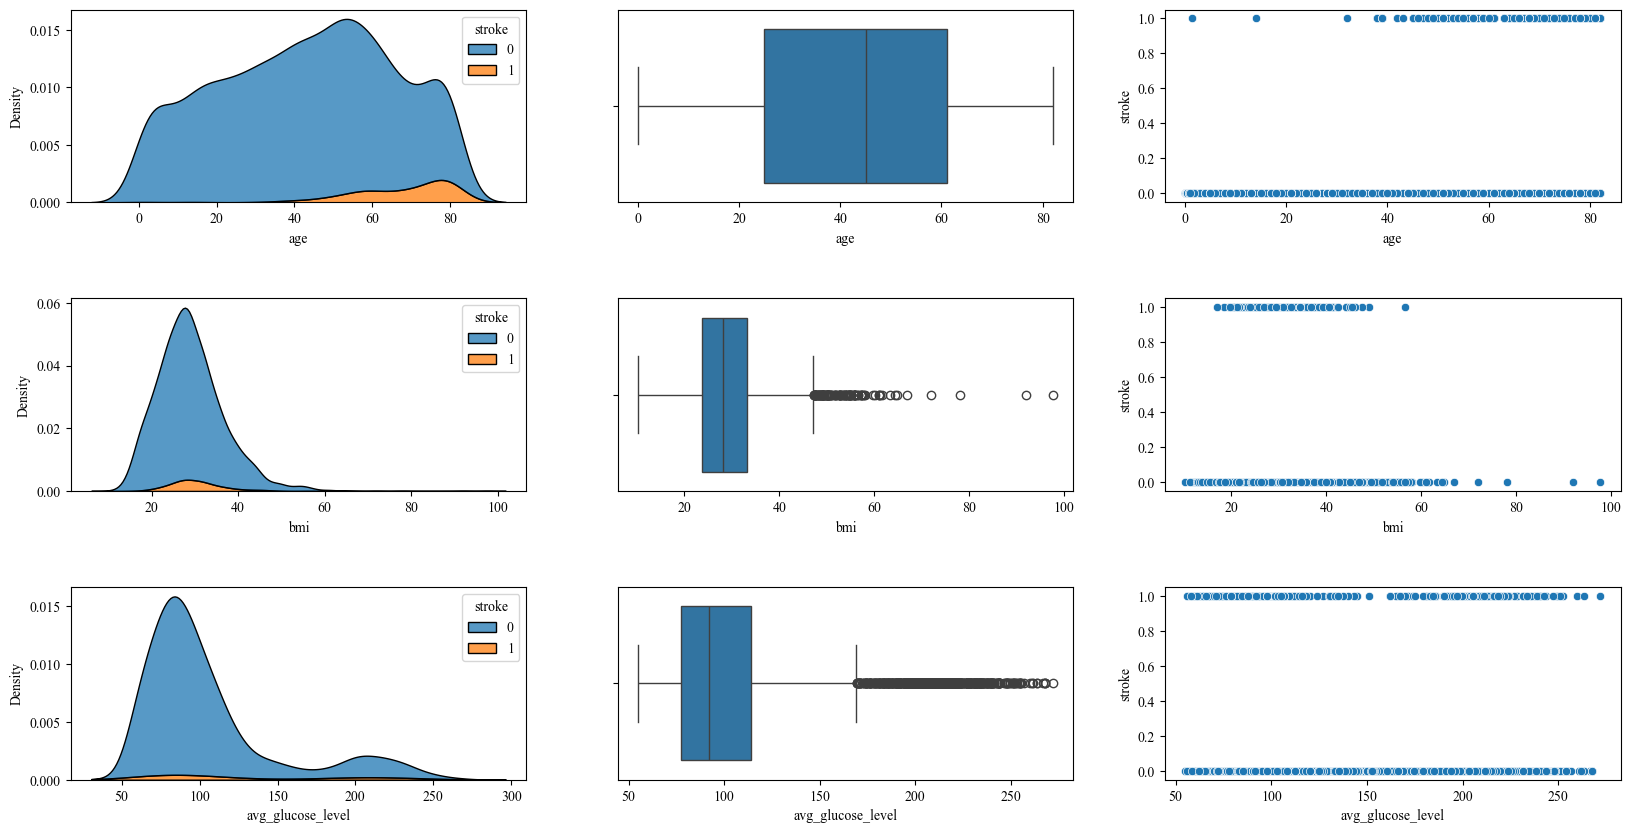

In [7]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=df, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=df, ax=ax[i, 2])
    i+=1
plt.show()

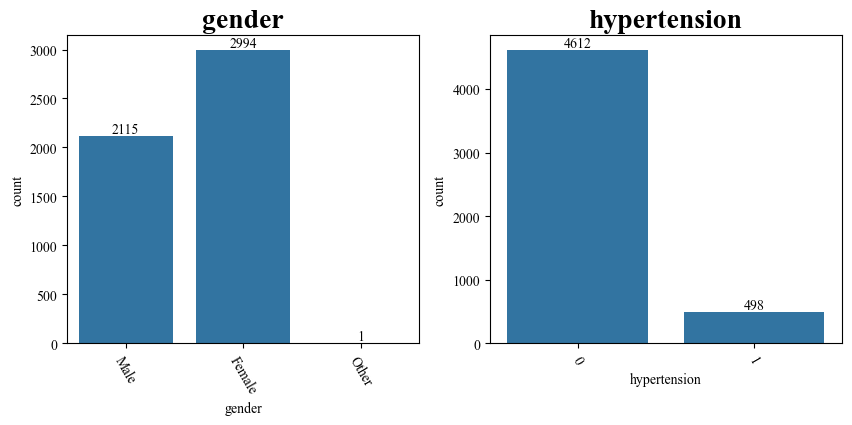

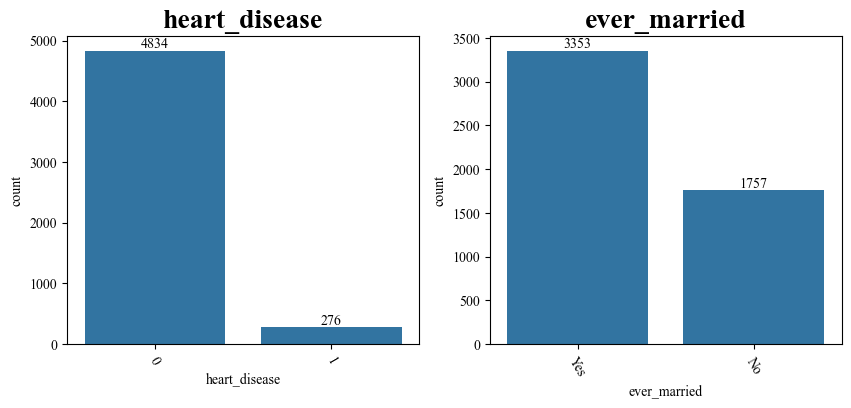

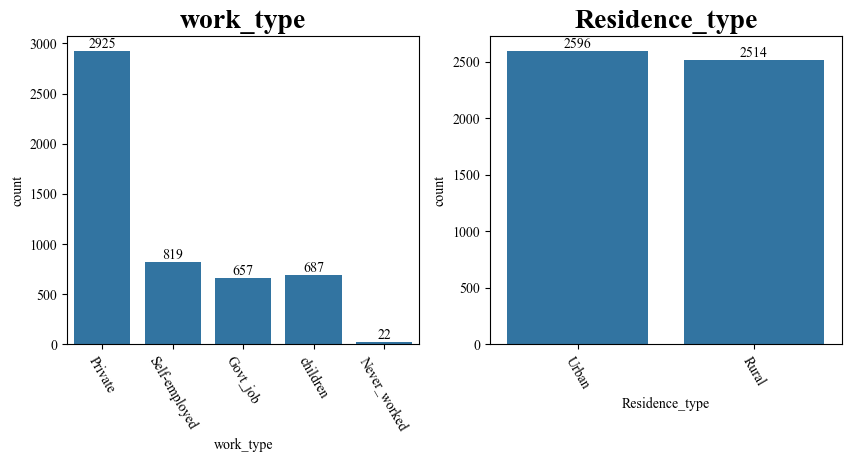

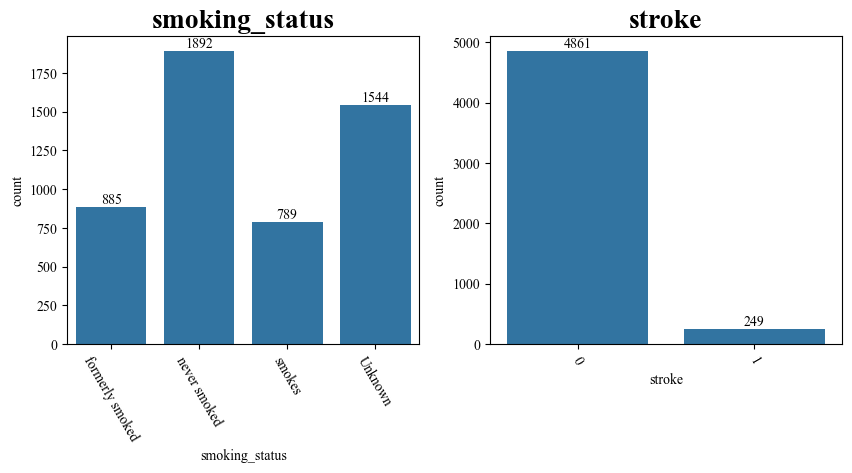

In [8]:
# Código para generar gráficos
i = 0
while i < 8:
    # Crear una nueva figura
    fig = plt.figure(figsize=(10, 4))
    
    # Subgráfico izquierdo
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold')
    ax = sns.countplot(x=categorical_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    
    i += 1
    
    # Subgráfico derecho
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold')
    ax = sns.countplot(x=categorical_columns[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    
    i += 1
    plt.show()
